#ZOMATO DATA ANALYSIS 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#DATA CLEANING AND PREPROCESSING 

In [17]:
miss_values = df.isnull().sum()
print(miss_values)
#handling rate column 
def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate']=df['rate'].apply(handlerate)
df.head()
#basic summary 
df_stats = df.describe()
print("Basic summary of the dataframe:",df_stats)
print("Information:",print(df.info()))

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64
Basic summary of the dataframe:              rate        votes  approx_cost(for two people)
count  148.000000   148.000000                   148.000000
mean     3.633108   264.810811                   418.243243
std      0.402271   653.676951                   223.085098
min      2.600000     0.000000                   100.000000
25%      3.300000     6.750000                   200.000000
50%      3.700000    43.500000                   400.000000
75%      3.900000   221.750000                   600.000000
max      4.600000  4884.000000                   950.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------           

#Types of restuarnt

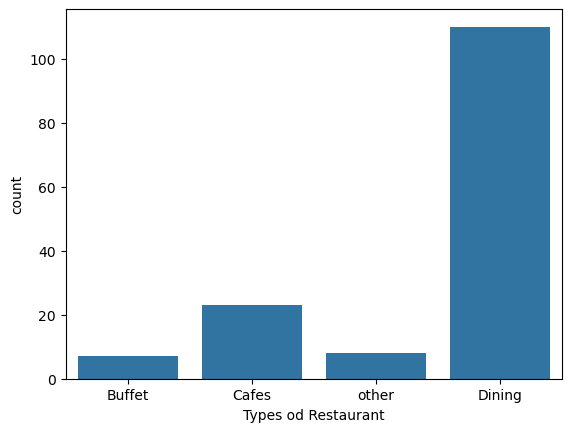

In [26]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Types od Restaurant')
plt.show()


CONCLUSION: Majority of customers order form dinning restaurants 

Votes of each type of restaurant

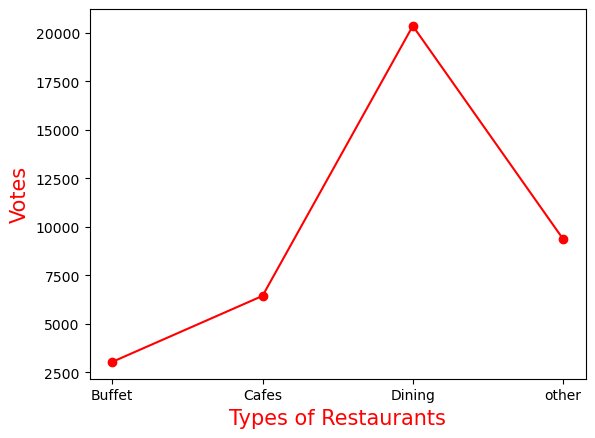

In [41]:
group_by = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_by})
plt.plot(result, color='red', marker="o")
plt.xlabel('Types of Restaurants', c='red', size=15)
plt.ylabel('Votes', c='red', size=15)
plt.show()

CONCLUSION: Dinning has the Most Votes and Buffet has the Least Votes 

RATING OF RESTAURANTS 

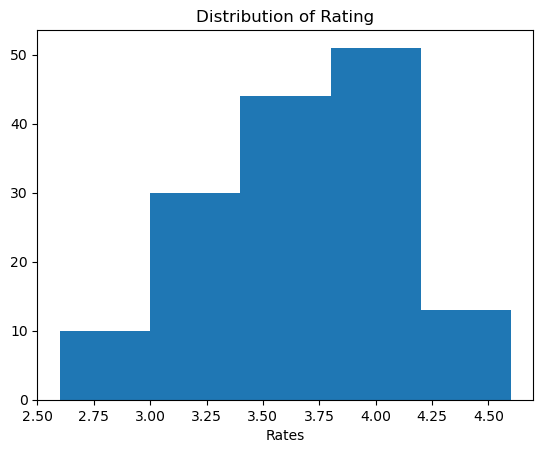

In [43]:
plt.hist(df['rate'], bins=5)
plt.title('Distribution of Rating')
plt.xlabel('Rates')
plt.show()

CONCLUSION: Majority of Restaurants recieved ratings from 3.5 to 4

Average orders by Couples

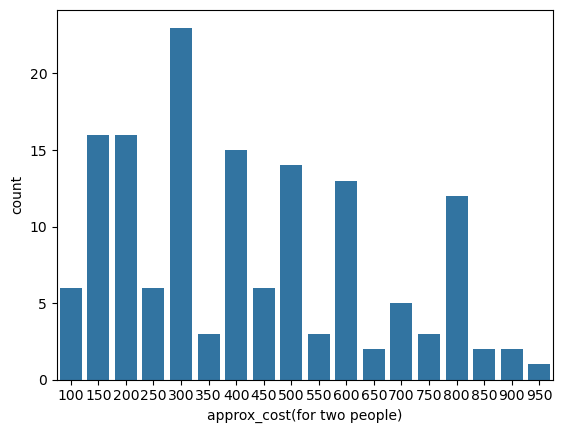

In [44]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)
plt.show()